# Semi-supervised Learning example

* How to prepare and execute SSL experiments
* ```ClusterAndLabelClassifier``` is a SSL algorithm implemented in MOA

**Notebook last updated on 08/12/2023**

In [5]:
# Create the JVM and add the MOA jar to the classpath
from prepare_jpype import start_jpype
start_jpype()

In [6]:
# imports from the library. 
from stream import stream_from_file
from learners import MOAClassifierSSL
from visualization import plot_windowed_results
from evaluation import prequential_SSL_evaluation

In [7]:
## Read the stream from a file. CSV files also work, but it is better to use ARFF files (especially if datasets are large). 
rbf_arff_file_path = './data/RBFm_100k.arff'
stream = stream_from_file(path_to_csv_or_arff=rbf_arff_file_path, class_index=-1)

{'learner': 'ClusterAndLabelClassifier',
 'cumulative': <evaluation.ClassificationEvaluator at 0x14c57c350>,
 'windowed': <evaluation.ClassificationWindowedEvaluator at 0x14c5820d0>,
 'wallclock': 12.616607904434204,
 'cpu_time': 25.412976999999998,
 'other_measurements': {'num_unlabeled_instances': 99015.0,
  'pseudo_label_accuracy': 0.28931,
  'num_correct_pseudo_labeled': 28931.0,
  'num_instances_tested': 100000.0}}

28.954


,classified instances,classifications correct (percent),Kappa Statistic (percent),Kappa Temporal Statistic (percent),Kappa M Statistic (percent)
0,1000.0,24.2,0.192242,2.067183,-10.334789
1,2000.0,24.4,2.824141,2.451613,-11.176471
2,3000.0,30.2,8.743139,8.877285,0.569801
3,4000.0,30.1,9.884590,7.783641,0.000000
4,5000.0,28.3,8.987746,8.429119,1.510989
...,...,...,...,...,...
95,96000.0,30.8,11.006628,9.778357,1.283880
96,97000.0,32.1,14.752254,13.282248,4.634831
97,98000.0,35.1,17.029848,17.324841,8.203678
98,99000.0,31.8,13.239058,12.000000,1.729107


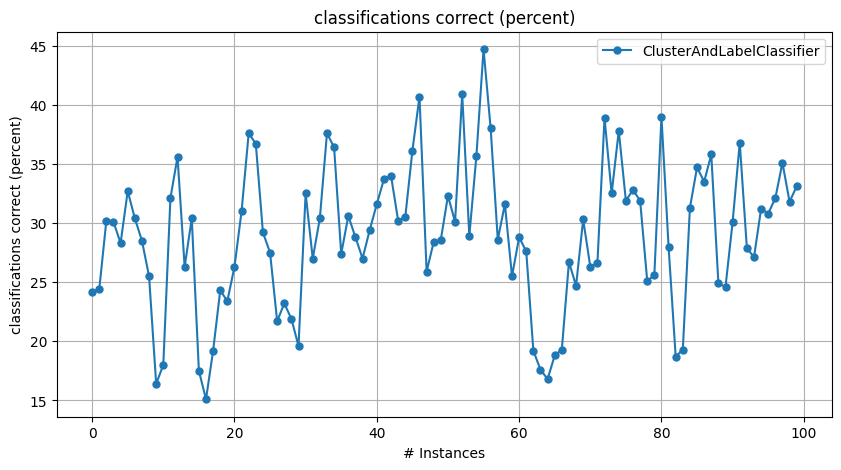

In [8]:
from moa.classifiers.semisupervised import ClusterAndLabelClassifier

# Create a ClusterAndLabel instances and configure it with 100 microclusters
cl_100 = MOAClassifierSSL(moa_learner=ClusterAndLabelClassifier(), CLI='-p -c (Clustream -k 100)')

results_cl_100 = prequential_SSL_evaluation(stream=stream, learner=cl_100, label_probability=0.01, window_size=1000)

# The results are stored in a dictionary. The cumulative and windowed objects provides access to the metrics, 
# while other metrics are available directly in the dictionary
display(results_cl_100)

print(results_cl_100['cumulative'].accuracy()) # Test-then-train accuracy, i.e. cumulatively, not windowed. 
display(results_cl_100['windowed'].metrics_per_window()) # A dataframe containing the windowed results. 

# Plotting over time (default: classifications correct (percent) i.e. accuracy)
plot_windowed_results(results_cl_100)

In [9]:
# Creating another cluster and label object. 
# The hyperparameters are defined via a command line passed to the object. See object.CLI_help()
cl_50 = MOAClassifierSSL(moa_learner=ClusterAndLabelClassifier(), CLI='-p -c (Clustream -k 50)')

results_cl_50 = prequential_SSL_evaluation(stream=stream, learner=cl_50, label_probability=0.01, window_size=1000)

display(results_cl_50)
print(results_cl_50['cumulative'].accuracy())
display(results_cl_50['windowed'].metrics_per_window())

{'learner': 'ClusterAndLabelClassifier',
 'cumulative': <evaluation.ClassificationEvaluator at 0x12ea85990>,
 'windowed': <evaluation.ClassificationWindowedEvaluator at 0x14f109410>,
 'wallclock': 4.164032936096191,
 'cpu_time': 8.809932999999994,
 'other_measurements': {'num_unlabeled_instances': 99015.0,
  'pseudo_label_accuracy': 0.25152,
  'num_correct_pseudo_labeled': 25152.0,
  'num_instances_tested': 100000.0}}

25.162000000000003


,classified instances,classifications correct (percent),Kappa Statistic (percent),Kappa Temporal Statistic (percent),Kappa M Statistic (percent)
0,1000.0,23.4,0.705175,1.033592,-11.499272
1,2000.0,23.8,0.797655,1.677419,-12.058824
2,3000.0,23.6,2.834090,0.261097,-8.831909
3,4000.0,34.8,14.758985,13.984169,6.723891
4,5000.0,27.4,8.292806,7.279693,0.274725
...,...,...,...,...,...
95,96000.0,18.3,-1.835406,-6.518905,-16.547789
96,97000.0,14.4,-6.627736,-9.323116,-20.224719
97,98000.0,24.7,2.772470,4.076433,-6.506365
98,99000.0,28.5,5.575658,7.741935,-3.025937


In [10]:
# Checking the possible hyperparameters for the object
print(cl_100.CLI_help())

-c clustream (default: Clustream)
Used to configure clustream
-p pseudoLabel
Using pseudo-label while training
-e debugMode
Print information about the clusters on stdout
-k kNearestCluster (default: 1)
Issue predictions based on the majority vote from k-nearest cluster



## Using a supervised learner in a SSL setting

* We can also train any MOA learner only on the labeled data and evaluate it on all of the data.



In [12]:
from moa.classifiers.meta import StreamingRandomPatches
from learners import MOAClassifier

srp10 = MOAClassifier(moa_learner=StreamingRandomPatches(), CLI="-s 10")

results_srp10 = prequential_SSL_evaluation(stream=stream, learner=srp10, label_probability=0.01, window_size=1000)

display(results_srp10)
print(results_srp10['cumulative'].accuracy())
display(results_srp10['windowed'].metrics_per_window())

{'learner': 'StreamingRandomPatches',
 'cumulative': <evaluation.ClassificationEvaluator at 0x14c5ed990>,
 'windowed': <evaluation.ClassificationWindowedEvaluator at 0x14c5ed290>,
 'wallclock': 3.4363582134246826,
 'cpu_time': 5.221159999999998,
 'other_measurements': {'num_unlabeled_instances': 99015.0,
  'pseudo_label_accuracy': 0.0,
  'num_correct_pseudo_labeled': 0.0,
  'num_instances_tested': 100000.0}}

35.150999999999996


,classified instances,classifications correct (percent),Kappa Statistic (percent),Kappa Temporal Statistic (percent),Kappa M Statistic (percent)
0,1000.0,27.2,2.967230,5.943152,-5.967977
1,2000.0,26.6,8.113434,5.290323,-7.941176
2,3000.0,31.8,12.194419,10.966057,2.849003
3,4000.0,37.9,14.069494,18.073879,11.158798
4,5000.0,36.8,15.426614,19.284802,13.186813
...,...,...,...,...,...
95,96000.0,49.9,34.633019,34.680574,28.530670
96,97000.0,49.1,32.876613,34.993614,28.511236
97,98000.0,44.4,25.665965,29.171975,21.357850
98,99000.0,41.2,21.858596,24.129032,15.273775


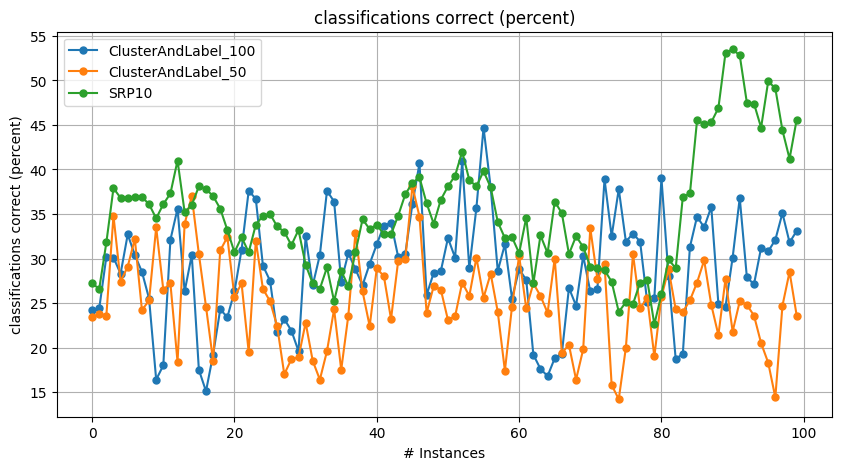

In [13]:
# Plotting all the results together
# Adding an experiment_id to the results dictionary allows controlling the legend of each learner. 
results_cl_100['experiment_id'] = 'ClusterAndLabel_100'
results_cl_50['experiment_id'] = 'ClusterAndLabel_50'
results_srp10['experiment_id'] = 'SRP10'

plot_windowed_results(results_cl_100, results_cl_50, results_srp10)